# 16기 Clustering 정규세션 과제

## Clustering 해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. Clustering 
수업 내용 및 실습 자료를 참고하여 클러스터링을 자유롭게 진행해주세요. 한 알고리즘에 대해 파라미터를 바꿔가며 비교를 해도 되고, 여러 알고리즘의 결과를 비교해도 됩니다.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

## 0. 데이터 불러오기

In [3]:
import pandas as pd

df = pd.read_csv("Mall_Customers.csv", index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
df.shape

(200, 4)

In [5]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
# 유사도 측정을 위해 Gender에서 Male -> 0 , Female -> 1 로 변경
df['Gender'].replace("Male", 0, inplace=True)
df['Gender'].replace("Female", 1, inplace=True)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,0,19,15,39
2,0,21,15,81
3,1,20,16,6
4,1,23,16,77
5,1,31,17,40
...,...,...,...,...
196,1,35,120,79
197,1,45,126,28
198,0,32,126,74


In [7]:
df['Spending Score (1-100)']

CustomerID
1      39
2      81
3       6
4      77
5      40
       ..
196    79
197    28
198    74
199    18
200    83
Name: Spending Score (1-100), Length: 200, dtype: int64

### AgglomerativeClustering

In [8]:
#euclidean& average
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean',linkage ='average')
model.fit(df[['Annual Income (k$)','Spending Score (1-100)']])

AgglomerativeClustering(linkage='average', n_clusters=4)

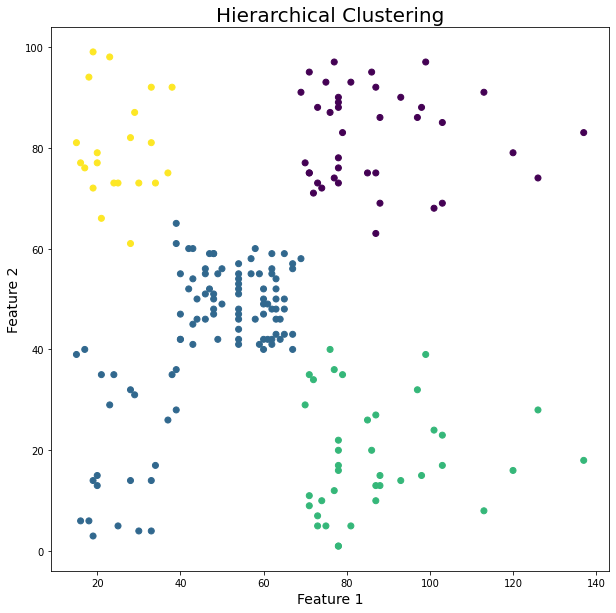

In [9]:
import matplotlib.pyplot as plt 
import matplotlib
df['labels']=model.labels_

plt.figure(figsize=(10,10))
plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"],c=df['labels'])
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

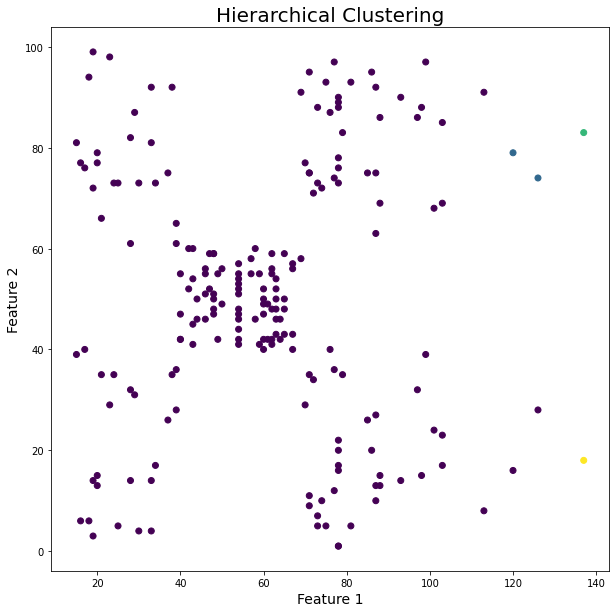

In [10]:
# euclidean & single
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')
model.fit(df[['Annual Income (k$)','Spending Score (1-100)']])

df['labels']=model.labels_

plt.figure(figsize=(10,10))
plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"],c=df['labels'])
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

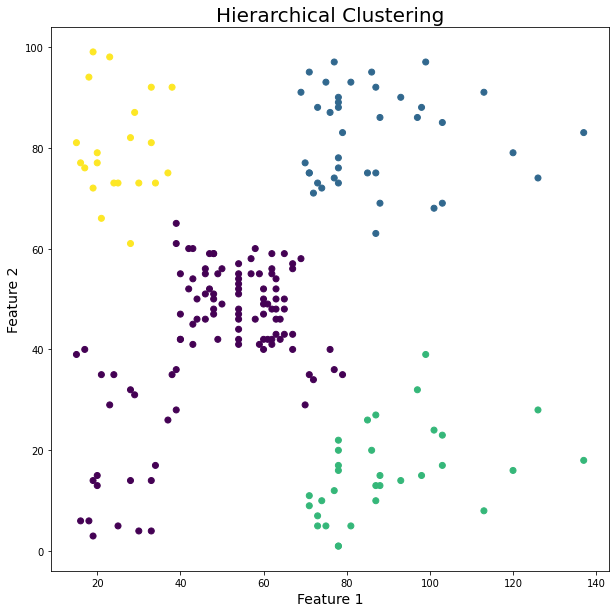

In [11]:
#euclidean & complete
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
model.fit(df[['Annual Income (k$)','Spending Score (1-100)']])

df['labels']=model.labels_

plt.figure(figsize=(10,10))
plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"],c=df['labels'])
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

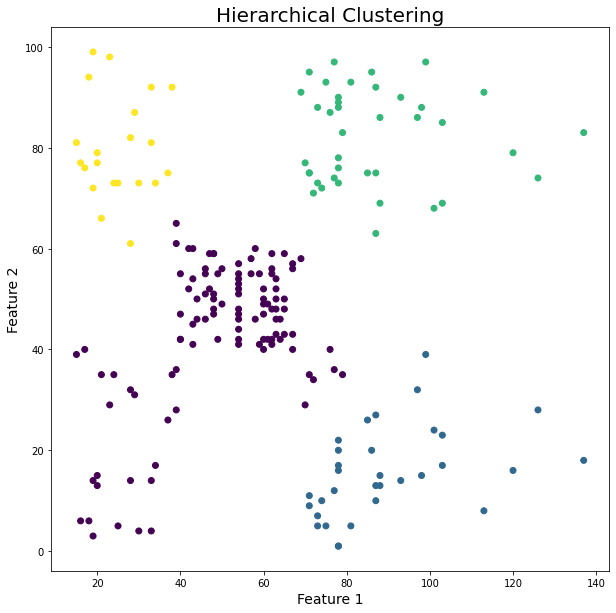

In [13]:
#euclidean & ward
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
model.fit(df[['Annual Income (k$)','Spending Score (1-100)']])

df['labels']=model.labels_

plt.figure(figsize=(10,10))
plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"],c=df['labels'])
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

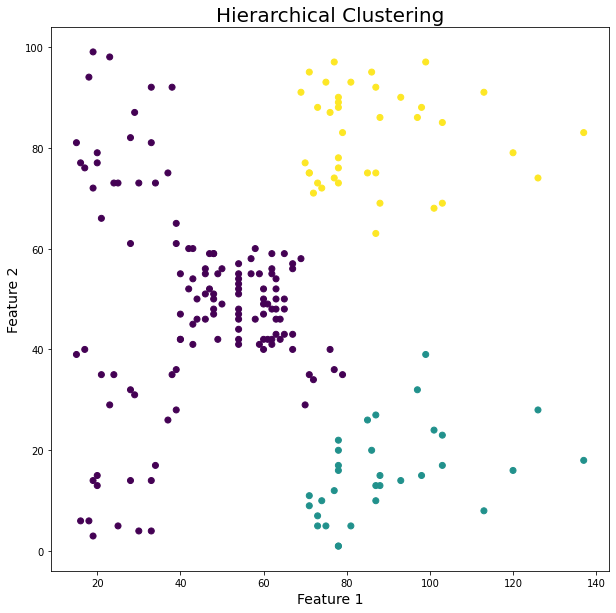

In [16]:
#euclidean & ward
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit(df[['Annual Income (k$)','Spending Score (1-100)']])

df['labels']=model.labels_

plt.figure(figsize=(10,10))
plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"],c=df['labels'])
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

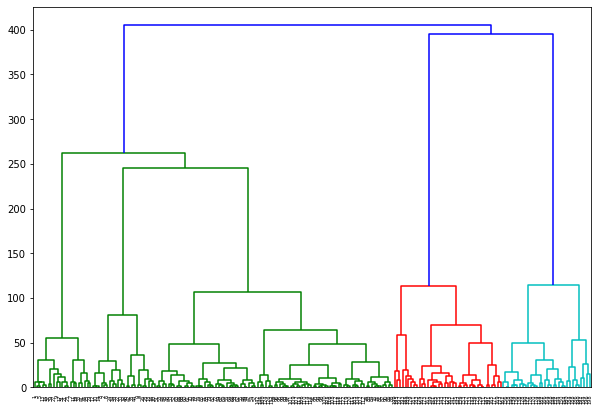

In [56]:
# Dendrogram 그려보기
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(df[['Annual Income (k$)','Spending Score (1-100)']], 'ward') #complete, average, weighted, centroid,median,ward

# labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

Dendrogram 확인결과 cluster 수는 5개가 적합할 것으로 판단된다.

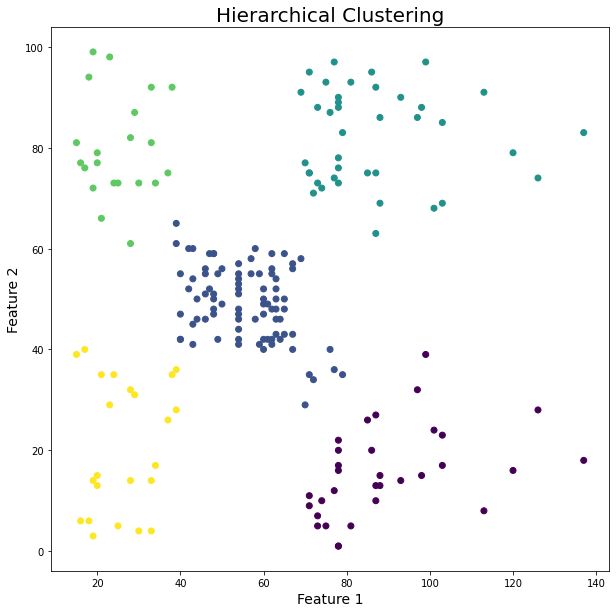

In [17]:
#euclidean & ward
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model.fit(df[['Annual Income (k$)','Spending Score (1-100)']])

df['labels']=model.labels_

plt.figure(figsize=(10,10))
plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"],c=df['labels'])
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

Annual income 과 spending score를 비교하였을 때,
cluster가 5이고 단일연결법(single)이 아닐때 적절하게 클러스터링 되는 것을 확인 할 수 있었다.